## Name : Vrajkumar Patel
### House Prices - Advanced Regression Techniques


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [29]:
#Loading train and test datasets
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [30]:
#Viewing the contents of the dataset
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


By getting the info on train data, we can see the columns and their datatypes.
Our task is to predict housing prices using the attributes **Square footage**, **No. of Bedrooms** & **No. of Bathrooms**

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see that the no.of bathrooms is provided in 2 varities: **Full Bathrooms** & **Half Bathrooms** and there are 2 columns for each variant i.e.
For Full Bathrooms : **FullBath** & **BsmtFullBath**,
For Half Bathrooms : **HalfBath** & **BsmtHalflBath**

In [32]:
# We can find the correlation between the various bathrooms and sales price
bath_sales_df = train_data[['FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath', 'SalePrice']]
bath_sales_df

,FullBath,BsmtFullBath,HalfBath,BsmtHalfBath,SalePrice
0,2,1,1,0,208500
1,2,0,0,1,181500
2,2,1,1,0,223500
3,1,1,0,0,140000
4,2,1,1,0,250000
...,...,...,...,...,...
1455,2,0,1,0,175000
1456,2,1,0,0,210000
1457,2,0,0,0,266500
1458,1,1,0,0,142125


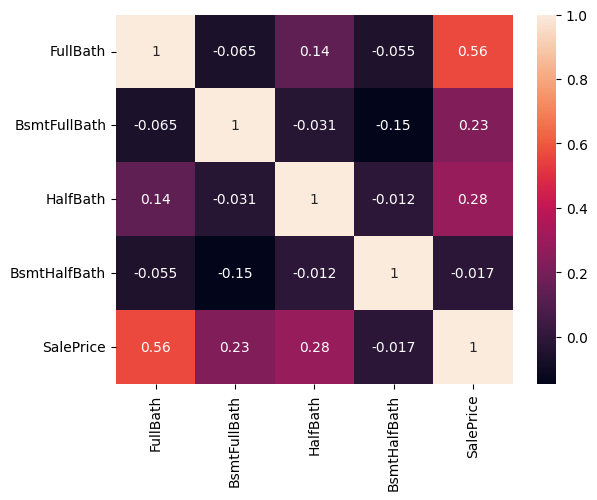

In [33]:
sns.heatmap(bath_sales_df.corr(), annot=True)
plt.show()

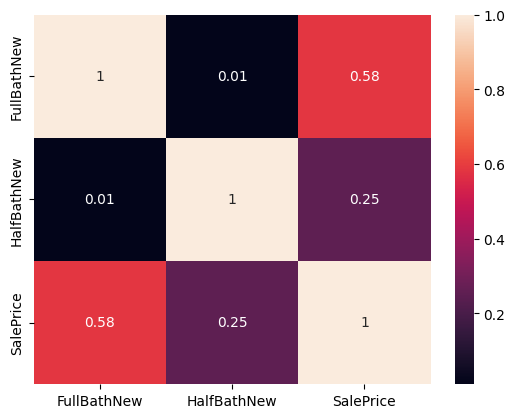

In [34]:
#We can create new features for each bathroom type (Full or Half)
fullcomb = train_data['FullBath'] + train_data['BsmtFullBath']
halfcomb = train_data['HalfBath'] + train_data['BsmtHalfBath']

bath_sales_new = pd.DataFrame({'FullBathNew':fullcomb, 'HalfBathNew':halfcomb, 'SalePrice':train_data['SalePrice']})
sns.heatmap(bath_sales_new.corr(), annot=True)
plt.show()

We can see the correlation is improved with new variables compared to older ones

In [35]:
#We need only Square footage, No.of Bedrooms and No.of Bathrooms data for our ML model
train_data_filt = pd.DataFrame({'LotArea':train_data['LotArea'], 'FullBathComb':fullcomb, 'HalfBathComb':halfcomb, 'Bedrooms':train_data['BedroomAbvGr'], 'SalePrice':train_data['SalePrice']})
train_data_filt.head()

,LotArea,FullBathComb,HalfBathComb,Bedrooms,SalePrice
0,8450,3,1,3,208500
1,9600,2,1,3,181500
2,11250,3,1,3,223500
3,9550,2,0,3,140000
4,14260,3,1,4,250000


In [36]:
# We can see that it has no null values
train_data_filt.isna().sum()

LotArea         0
FullBathComb    0
HalfBathComb    0
Bedrooms        0
SalePrice       0
dtype: int64

We can see the distribution of input parameters against sale price

<Axes: xlabel='LotArea', ylabel='SalePrice'>

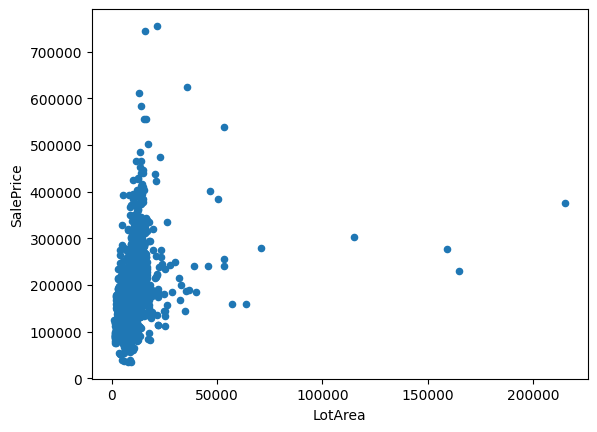

In [37]:
train_data_filt.plot(kind='scatter',x='LotArea', y='SalePrice', )

<Axes: xlabel='Bedrooms', ylabel='SalePrice'>

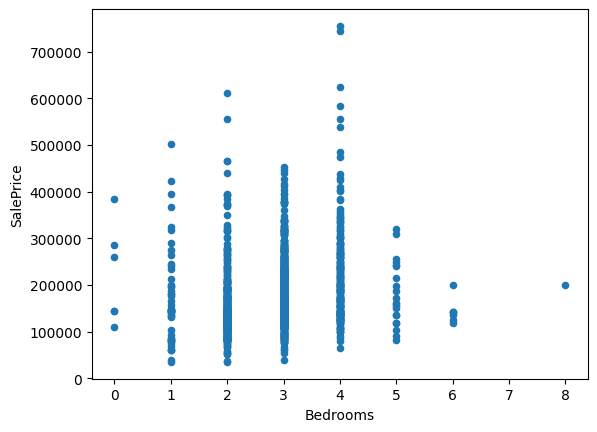

In [38]:
train_data_filt.plot(kind='scatter',x='Bedrooms', y='SalePrice' )

In [39]:
train_data_filt.describe()

,LotArea,FullBathComb,HalfBathComb,Bedrooms,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1.990411,0.440411,2.866438,180921.195890
std,9981.264932,0.732046,0.554016,0.815778,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1.000000,0.000000,2.000000,129975.000000
50%,9478.500000,2.000000,0.000000,3.000000,163000.000000
75%,11601.500000,2.000000,1.000000,3.000000,214000.000000
max,215245.000000,6.000000,4.000000,8.000000,755000.000000


We can see that there is a huge difference in the mean and deviation values of input parameters (LotArea,	FullBathComb,	HalfBathComb & Bedrooms).
We will apply z-score normalization to normalize these values

In [40]:
train_data_transf = StandardScaler().fit_transform(train_data_filt.iloc[:, :-1])
train_data_transf

array([[-0.20714171,  1.37960564,  1.01040607,  0.16377912],
       [-0.09188637,  0.01310345,  1.01040607,  0.16377912],
       [ 0.07347998,  1.37960564,  1.01040607,  0.16377912],
       ...,
       [-0.14781027,  0.01310345, -0.79521555,  1.39002276],
       [-0.08016039,  0.01310345, -0.79521555, -1.06246453],
       [-0.05811155,  0.01310345,  1.01040607,  0.16377912]])

In [41]:
x_train_transf = pd.DataFrame(train_data_transf, columns=['LotArea', 'FullBathComb', 'HalfBathComb', 'Bedrooms'])
x_train_transf

,LotArea,FullBathComb,HalfBathComb,Bedrooms
0,-0.207142,1.379606,1.010406,0.163779
1,-0.091886,0.013103,1.010406,0.163779
2,0.073480,1.379606,1.010406,0.163779
3,-0.096897,0.013103,-0.795216,0.163779
4,0.375148,1.379606,1.010406,1.390023
...,...,...,...,...
1455,-0.260560,0.013103,1.010406,0.163779
1456,0.266407,1.379606,-0.795216,0.163779
1457,-0.147810,0.013103,-0.795216,1.390023
1458,-0.080160,0.013103,-0.795216,-1.062465


In [42]:
y_train = train_data_filt['SalePrice']
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    x_train_transf, y_train, test_size=0.25, random_state=42)

We will create the linear regression model using sklearn's LinearRegression class module and fit it to our housing data

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model

LinearRegression()

In [45]:
#R2 Value
lr_model.score(X_test, y_test)

0.4529185974643213

In [46]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [47]:
# Testing the model performance
test_data = pd.read_csv('test.csv')
fullcomb_test = test_data['FullBath'] + test_data['BsmtFullBath']
halfcomb_test = test_data['HalfBath'] + test_data['BsmtHalfBath']
test_data_x = pd.DataFrame({'LotArea':test_data['LotArea'], 'FullBathComb':fullcomb_test, 'HalfBathComb':halfcomb_test, 'Bedrooms':test_data['BedroomAbvGr']})
test_data_x

,LotArea,FullBathComb,HalfBathComb,Bedrooms
0,11622,1.0,0.0,2
1,14267,1.0,1.0,3
2,13830,2.0,1.0,3
3,9978,2.0,1.0,3
4,5005,2.0,0.0,2
...,...,...,...,...
1454,1936,1.0,1.0,3
1455,1894,1.0,1.0,3
1456,20000,2.0,0.0,4
1457,10441,1.0,1.0,3


In [48]:
test_data_transf = StandardScaler().fit_transform(test_data_x.iloc[:, :])
test_data_transf

array([[ 0.36392912, -1.29367496, -0.82114784, -1.02954254],
       [ 0.89786065, -1.29367496,  1.03375511,  0.17599724],
       [ 0.80964587, -0.0061856 ,  1.03375511,  0.17599724],
       ...,
       [ 2.05514965, -0.0061856 , -0.82114784,  1.38153702],
       [ 0.12552719, -1.29367496,  1.03375511,  0.17599724],
       [-0.03879049, -0.0061856 ,  1.03375511,  0.17599724]])

In [49]:
x_test_transf = pd.DataFrame(test_data_transf, columns=['LotArea', 'FullBathComb', 'HalfBathComb', 'Bedrooms'])
x_test_transf

,LotArea,FullBathComb,HalfBathComb,Bedrooms
0,0.363929,-1.293675,-0.821148,-1.029543
1,0.897861,-1.293675,1.033755,0.175997
2,0.809646,-0.006186,1.033755,0.175997
3,0.032064,-0.006186,1.033755,0.175997
4,-0.971808,-0.006186,-0.821148,-1.029543
...,...,...,...,...
1454,-1.591330,-1.293675,1.033755,0.175997
1455,-1.599808,-1.293675,1.033755,0.175997
1456,2.055150,-0.006186,-0.821148,1.381537
1457,0.125527,-1.293675,1.033755,0.175997


In [50]:
x_test_transf = x_test_transf.fillna(0)

In [51]:
y_predict = lr_model.predict(x_test_transf)

In [52]:
prediction_data = pd.DataFrame({'Id':test_data['Id'], 'SalePrice':y_predict})
prediction_data

,Id,SalePrice
0,1461,114575.795619
1,1462,153043.709580
2,1463,207161.466551
3,1464,199535.514487
4,1465,156458.769683
...,...,...
1454,2915,128631.556177
1455,2916,128548.407167
1456,2917,186270.587236
1457,2918,145469.230712


In [53]:
prediction_data.to_csv('prediction.csv', index=False)